<a href="https://colab.research.google.com/github/snikhil17/Deep-Learning/blob/main/CNN_Regex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


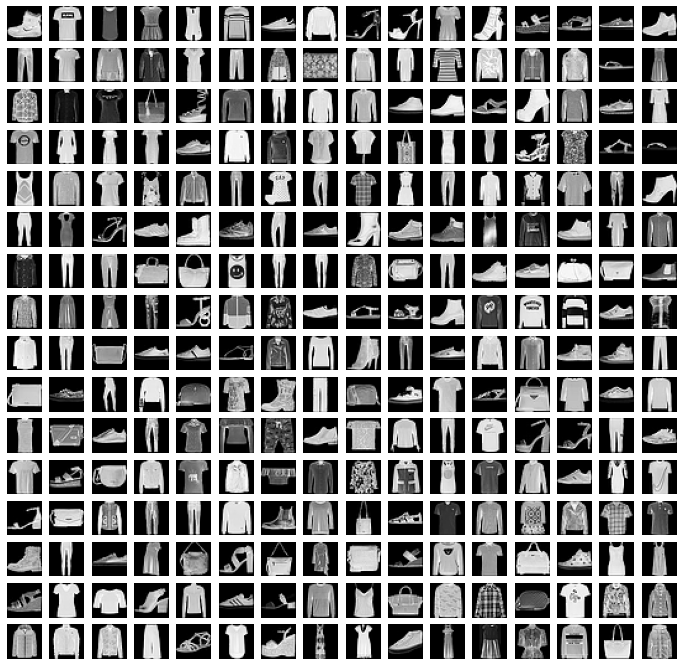

In [5]:
plt.figure(figsize= (12,12))
for i in range(256):
  plt.subplot(16,16,i+1)
  plt.axis('off')
  plt.imshow(x_train[i], cmap = 'gray')

In [6]:
#  We are reshaping the data, 
# 60000: number of images
# 28,28 : pixels
# 1: Grayscale 
x_train = x_train.reshape([60000, 28,28,1])
x_test = x_test.reshape([10000, 28,28,1])

In [7]:
"""One hot encoding the labels"""
#  earlier shape: 60000
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)
#  10:  because classes are 10

"""Checking the shape again"""
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


## **Using Tensorflow**

## **Image Augmentation : Making model roubst, feeding model with different angles, sides, zooming, aspects etc.**

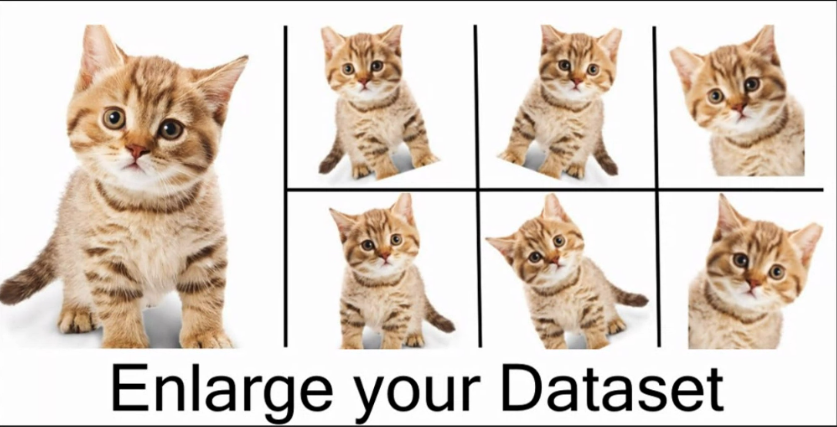

In [8]:
"""Image augmentation using Tensorflow"""
# can be written as 10 or 0.1
# '1.' because to get floats
train_datagen = ImageDataGenerator(
  rescale = 1./255,  
  rotation_range = 10,
  zoom_range = 0.1, 
  height_shift_range = 0.1, 
  horizontal_flip = False,
  vertical_flip = False
)

train_datagen.fit(x_train)

In [9]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen.fit(x_test)

## **Create Convulation Neural Network**

In [10]:
model = tf.keras.Sequential([
# """Adding convulation Layers"""
         tf.keras.layers.Conv2D(64, (5,5),padding = 'same',activation = 'relu', input_shape = (28,28,1)),
# """Adding pooling layer""" 
         tf.keras.layers.MaxPooling2D((2,2)),

# """Adding convulation Layers"""      
         tf.keras.layers.Conv2D(128, (3,3), padding= 'same',activation = 'relu'),
         tf.keras.layers.Conv2D(128, (3,3), padding= 'same',activation = 'relu'),
         tf.keras.layers.Conv2D(128, (3,3), padding= 'same',activation = 'relu'),
# """Adding pooling layer""" 
         tf.keras.layers.MaxPooling2D((2,2)),

# """Adding convulation Layers"""       
        tf.keras.layers.Conv2D(256, (3,3), padding = 'same', activation = 'relu'),
        tf.keras.layers.Conv2D(256, (3,3), padding = 'same', activation = 'relu'),
        tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),

# flattening the matrix to 1 col vector
         tf.keras.layers.Flatten(),

# """Adding Output Layers"""
         tf.keras.layers.Dense(128, activation = 'relu'),
         tf.keras.layers.Dense(10, activation = 'softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         2

## Observations:
- Flatten : Like an input layer, since input layer param = 0
- filter  = 64, channel for each filters = 1, activation = 64
- 64 * 3 * 3 * 1 + 64 = 640
- Similarly next channel 128 * 3 * 3 * 64 +128 = 73856

In [12]:
64 * 3 * 3 * 1 + 64 

128 * 3 * 3 * 64 +128

73856

# **Compile the model**

In [13]:
from tensorflow.keras.optimizers import SGD, Adam
model.compile(optimizer = Adam(), 
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

# **Fit the Model**

In [14]:
"""Use here augmented Data"""
history = model.fit(
    train_datagen.flow(x_train, y_train, batch_size = 64),
    validation_data = val_datagen.flow(x_test,y_test,batch_size = 64 ),
    epochs = 30,
    verbose = 1
)

Epoch 1/30
938/938 [==============================] - 69s 40ms/step - loss: 0.6227 - accuracy: 0.7638 - val_loss: 0.3796 - val_accuracy: 0.8514
Epoch 2/30
938/938 [==============================] - 37s 40ms/step - loss: 0.4097 - accuracy: 0.8405 - val_loss: 0.3309 - val_accuracy: 0.8731
Epoch 3/30
938/938 [==============================] - 37s 39ms/step - loss: 0.3559 - accuracy: 0.8634 - val_loss: 0.3076 - val_accuracy: 0.8811
Epoch 4/30
938/938 [==============================] - 37s 40ms/step - loss: 0.3291 - accuracy: 0.8744 - val_loss: 0.2889 - val_accuracy: 0.8937
Epoch 5/30
938/938 [==============================] - 37s 40ms/step - loss: 0.3028 - accuracy: 0.8845 - val_loss: 0.2846 - val_accuracy: 0.8953
Epoch 6/30
938/938 [==============================] - 37s 40ms/step - loss: 0.2877 - accuracy: 0.8896 - val_loss: 0.2674 - val_accuracy: 0.9010
Epoch 7/30
938/938 [==============================] - 37s 40ms/step - loss: 0.2760 - accuracy: 0.8958 - val_loss: 0.2525 - val_accuracy:

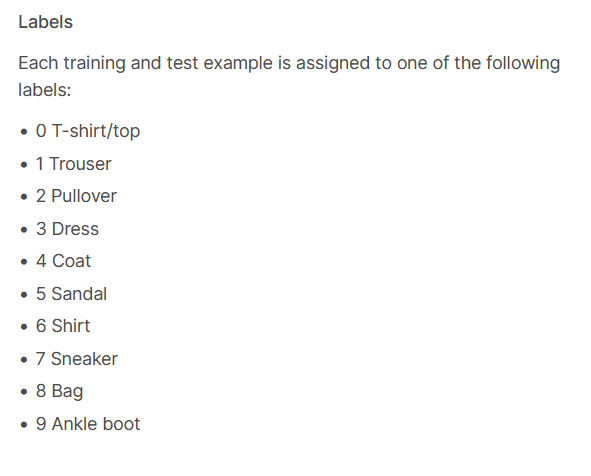

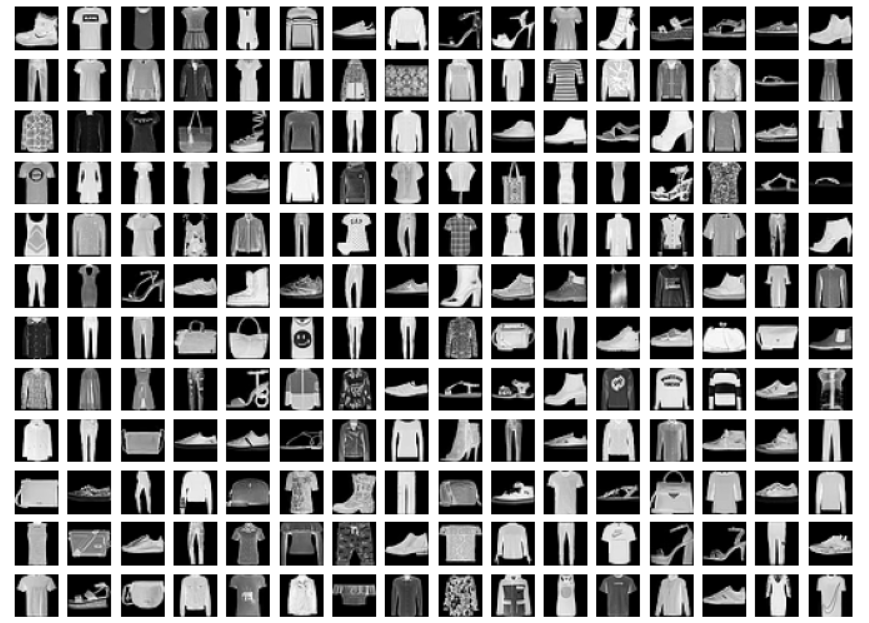

In [15]:
"""Predicting the image"""
model.predict([x_train[:1]]) # 0th item was Boot.

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [16]:
"""Predicting first 5 images"""
model.predict([x_train[:5]]) 
# 0th item was Boot.
# 1st Tshirt
# 2nd Pull Over


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.5693855e-14,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 2.0961260e-12, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [17]:
"""Predicting first 5 images"""
np.argmax(model.predict([x_train[:5]]), axis = 1)

array([9, 0, 0, 6, 0])

# **Getting the metrics**

## Using ``history`` to get the metrics: accuracies
- These metrics are stored in history object which contains another dict called history and the metrics are stored as keys and their relavtive values are resultant metrics  

In [18]:
history.history['accuracy']

[0.76378333568573,
 0.8405333161354065,
 0.8633833527565002,
 0.8743666410446167,
 0.8845000267028809,
 0.8895999789237976,
 0.8957666754722595,
 0.8997499942779541,
 0.9027833342552185,
 0.9060500264167786,
 0.9066333174705505,
 0.9099166393280029,
 0.9123666882514954,
 0.913016676902771,
 0.913516640663147,
 0.9160833358764648,
 0.9181833267211914,
 0.9187999963760376,
 0.9182500243186951,
 0.9195500016212463,
 0.921999990940094,
 0.9212499856948853,
 0.92208331823349,
 0.9250333309173584,
 0.9241833090782166,
 0.9253333210945129,
 0.9262499809265137,
 0.9274500012397766,
 0.9284166693687439,
 0.9297000169754028]

In [19]:
history.history['loss']

[0.6227179765701294,
 0.4096929132938385,
 0.35587286949157715,
 0.32910454273223877,
 0.30276864767074585,
 0.28772467374801636,
 0.27596843242645264,
 0.2672744393348694,
 0.25780895352363586,
 0.2492428869009018,
 0.24378721415996552,
 0.24028673768043518,
 0.23260653018951416,
 0.2315983921289444,
 0.2277141958475113,
 0.22062937915325165,
 0.21829837560653687,
 0.21430857479572296,
 0.21311748027801514,
 0.2130545824766159,
 0.20450885593891144,
 0.20774032175540924,
 0.20628054440021515,
 0.1996457427740097,
 0.1990816742181778,
 0.19688943028450012,
 0.1959913969039917,
 0.1935340315103531,
 0.19002866744995117,
 0.1893308013677597]

In [20]:
acc = history.history['accuracy'] # Training accuracy
val_acc = history.history['val_accuracy']

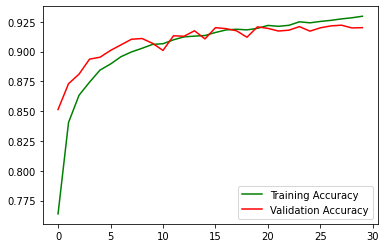

In [21]:
"""Plotting Trainng and Validation accuracy"""

plt.figure()
plt.plot(acc, color = 'green', label = "Training Accuracy")
plt.plot(val_acc, color = 'red', label = "Validation Accuracy")
plt.legend()

### **Plotting Losses**

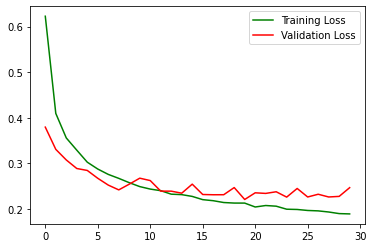

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']

"""Plotting Trainng and Validation Loss"""

plt.figure()
plt.plot(loss, color = 'green', label = "Training Loss")
plt.plot(val_loss, color = 'red', label = "Validation Loss")
plt.legend()